## Problem 1 – Lasso regression (35%)
Using the dataset ‘auto_mpg.csv’ included in the assignment, perform lasso regression to predict car mileage as a function of the remaining variables in the dataset (excluding car name). 


#### 15% credit.  Generate a plot of the MSE on validation data as a function of the regularization parameter via 10-fold cross-validation (see figure 6.12 in the ISL book). 

In [1]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.linear_model import LassoCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso


In [2]:
auto_mpg = pd.read_csv('auto_mpg.csv')
print(auto_mpg.shape)
auto_mpg.head()

(398, 9)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [3]:
# we want to predict car mileage based on other features, excluding the name of the car
#we predict mpg
auto_mpg.drop(['car name'], axis=1, inplace=True)
print(auto_mpg.shape)
auto_mpg.head()

(398, 8)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [4]:
# Check unique values in the 'horsepower' column
unique_values = auto_mpg['horsepower'].unique()
print(unique_values)

# Identify non-numeric values
non_numeric_values = auto_mpg.loc[~auto_mpg['horsepower'].str.isnumeric(), 'horsepower']
print(non_numeric_values)

print("there appears to be question marks in some of the horsepower values")


['130' '165' '150' '140' '198' '220' '215' '225' '190' '170' '160' '95'
 '97' '85' '88' '46' '87' '90' '113' '200' '210' '193' '?' '100' '105'
 '175' '153' '180' '110' '72' '86' '70' '76' '65' '69' '60' '80' '54'
 '208' '155' '112' '92' '145' '137' '158' '167' '94' '107' '230' '49' '75'
 '91' '122' '67' '83' '78' '52' '61' '93' '148' '129' '96' '71' '98' '115'
 '53' '81' '79' '120' '152' '102' '108' '68' '58' '149' '89' '63' '48'
 '66' '139' '103' '125' '133' '138' '135' '142' '77' '62' '132' '84' '64'
 '74' '116' '82']
32     ?
126    ?
330    ?
336    ?
354    ?
374    ?
Name: horsepower, dtype: object
there appears to be question marks in some of the horsepower values


In [5]:
auto_mpg['horsepower'] = pd.to_numeric(auto_mpg['horsepower'], errors='coerce') #first convert values to numeric, errors will be set to NaN
auto_mpg['horsepower'].fillna(auto_mpg['horsepower'].mean(), inplace=True) #fill in the missing values with the mean

# Convert the 'horsepower' column to integer
auto_mpg['horsepower'] = auto_mpg['horsepower'].astype(int)

In [6]:
auto_mpg.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower        int32
weight            int64
acceleration    float64
model year        int64
origin            int64
dtype: object

In [7]:
#now we split data into features and target
X = auto_mpg.iloc[:,1:]
y = auto_mpg.iloc[:,0] #mpg data

Text(0.5, 1.0, 'Correlation matrix for Auto MPG Features')

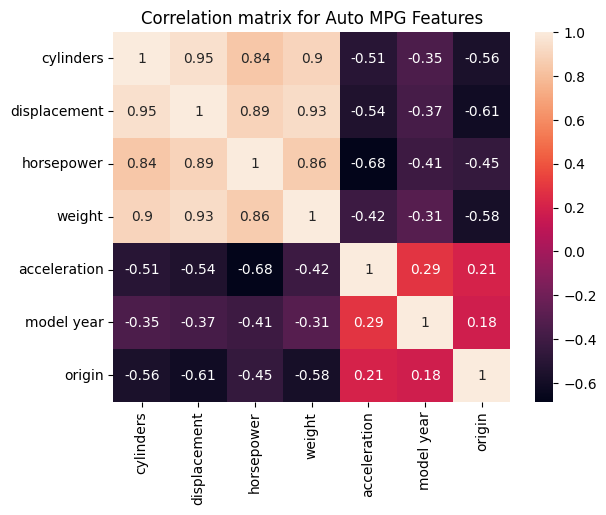

In [8]:
corr = X.corr()
sns.heatmap(corr, annot=True)
plt.title("Correlation matrix for Auto MPG Features")

In [9]:
# Create a range of alpha values (regularization parameter)
alphas = np.logspace(-4, 4, 100)

# Initialize LassoCV with 10-fold cv
_lasso_model = LassoCV(alphas=alphas, cv=10)

# Fit
_lasso_model.fit(X, y)

# Get the best alpha value
best_alpha = _lasso_model.alpha_

# Generate a plot of MSE
mse_values = []
kfold = KFold(n_splits=10)

for alpha in alphas:
    lasso_model = LassoCV(alphas=[alpha], cv=kfold)
    
    mse = -cross_val_score(lasso_model, X, y, scoring="neg_mean_squared_error", cv=kfold)
    mse_values.append(np.mean(mse))

In [10]:
print(best_alpha)
print(mse_values)

0.0001
[12.906208202767719, 12.906217237929251, 12.90622801922539, 12.90623840512169, 12.90625494932847, 12.906276294597053, 12.906299794922058, 12.906328270841524, 12.906361529857827, 12.906402209775042, 12.906451109974679, 12.906510173293466, 12.906581513680573, 12.90666830982181, 12.906773746009739, 12.906901481332174, 12.907057589978248, 12.907247535462355, 12.907480859152429, 12.907766749620237, 12.908118533534601, 12.908553907485143, 12.909094480380665, 12.909769179767602, 12.910615648787143, 12.911684711433841, 12.913041176547969, 12.914785589852363, 12.917039160673628, 12.91997525699983, 12.923835074833843, 12.928951532581788, 12.93578870649595, 12.94500914975155, 12.957534444977957, 12.974685715893695, 12.993297906297025, 12.998593257146975, 13.002726034542283, 13.018152955226043, 13.048976922636305, 13.0917799225325, 13.146427314817066, 13.222870623788461, 13.27253121994149, 13.325740732898742, 13.401564628372592, 13.408113910839935, 13.414444500623768, 13.426419372616232, 13

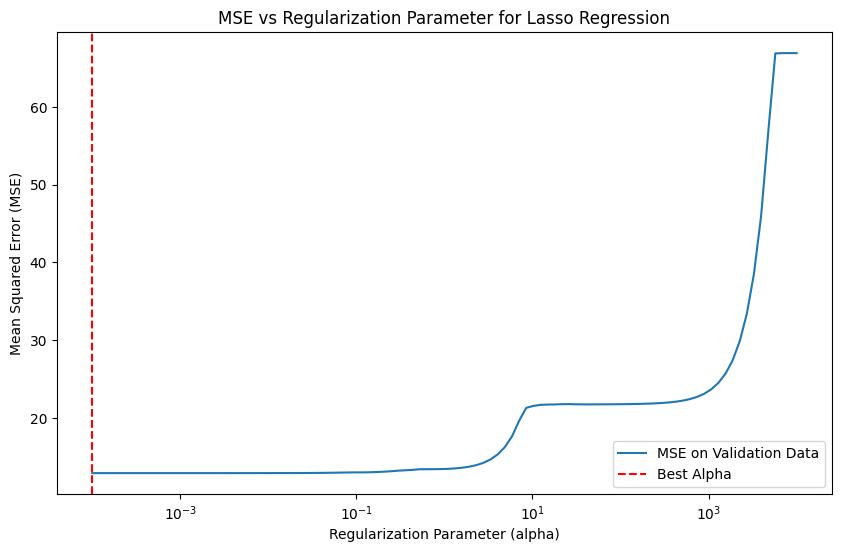

In [11]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(alphas, mse_values, label="MSE on Validation Data")
plt.axvline(x=best_alpha, color='r', linestyle='--', label='Best Alpha')
plt.xscale('log')
plt.xlabel('Regularization Parameter (alpha)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE vs Regularization Parameter for Lasso Regression')
plt.legend()
plt.show()

#### 20% credit. Generate a plot of the regression coefficients as a function of the regularization parameter (see figure 6.12 in the ISL book). 

In [12]:
# Initialize LassoCV with 10-fold cross-validation
_lasso_model = LassoCV(alphas=alphas, cv=10)

# Fit the model
_lasso_model.fit(X, y)

# Get the best alpha value
best_alpha = _lasso_model.alpha_


In [13]:
# Initialize array to store the coefficients for each alpha
coef_values = np.zeros((len(alphas), X.shape[1]))
#dimensions need to be the number of alphas x number of features

# Generate a plot of the regression coefficients as a function of the regularization parameter
kfold = KFold(n_splits=10)

for i, alpha in enumerate(alphas):
    lasso_model = LassoCV(alphas=[alpha], cv=kfold) #only one alpha
    lasso_model.fit(X, y)
    coef_values[i, :] = lasso_model.coef_ #store coefficients for each alpha

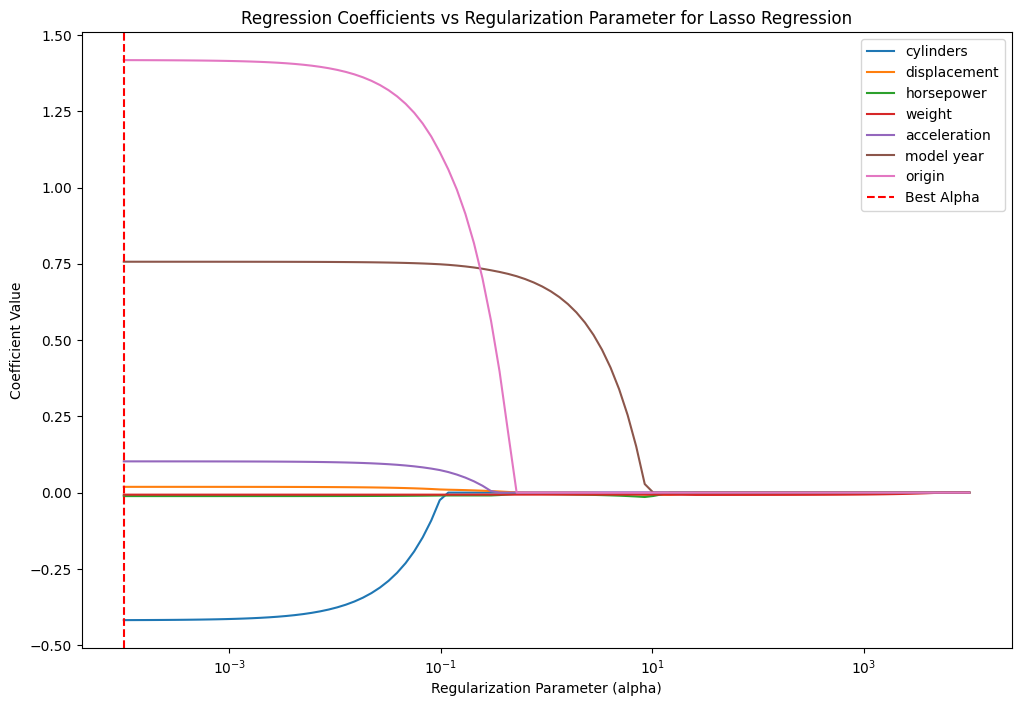

In [14]:
# Plot the results
plt.figure(figsize=(12, 8))

for i in range(X.shape[1]):
    plt.plot(alphas, coef_values[:, i], label=X.columns[i]) #plot the alphas against the coefficients for each associated alpha

# Add vertical dashed lines for the best alpha
plt.axvline(x=best_alpha, color='r', linestyle='--', label='Best Alpha')

plt.xscale('log')
plt.xlabel('Regularization Parameter (alpha)')
plt.ylabel('Coefficient Value')
plt.title('Regression Coefficients vs Regularization Parameter for Lasso Regression')
plt.legend()
plt.show()